**Task-04**

* Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

# Description

**About Dataset:** this is the Twitter Sentiment Analysis Dataset.

**Overview:**
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

**Problem Statement:**A Twitter sentiment analysis uses NLP and ML models to classify tweets into negative, positive or neutral emotions.


#Table of contents:
* Import Modules
* Exploratory data analysis(EDA)
* Data cleaning
* Data Visualization of Target Variables
* Preprocessed text
* Machine Learning Model

#  Import Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# Load the dataset
df=pd.read_csv('twitter_training.csv')

In [ ]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
# Exploratory data analysis(EDA)

In [ ]:
df.columns=['id','country','label','text']

In [ ]:
# shallow copy
df2=df.copy()

In [ ]:
#shape of a DataFrame.
df.shape

(74681, 4)

In [ ]:
# displays the top rows of a DataFrame
df.head()

,id,country,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
#shows the bottom rows
df.tail()

,id,country,label,text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [ ]:
# specific rows of a DataFrame ( "integer location" Method)
df.iloc[100:200]

,id,country,label,text
100,2417,Borderlands,Negative,Grounded almost was pretty cool even despite t...
101,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...
102,2418,Borderlands,Irrelevant,Appreciate the (sound) concepts / practices th...
103,2418,Borderlands,Irrelevant,Evaluate the (sound) concepts / concepts of Va...
104,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...
...,...,...,...,...
195,2433,Borderlands,Neutral,i then enter in that gunner seat and i fear fo...
196,2433,Borderlands,Neutral,i enter that gunner seat and i fear for a life
197,2434,Borderlands,Negative,fuck it . pic.twitter.com/Wav1bacr5j
198,2434,Borderlands,Negative,Fuck it. pic.twitter.com / Wav1bacr5j


In [ ]:
# prints information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74681 non-null  int64 
 1   country  74681 non-null  object
 2   label    74681 non-null  object
 3   text     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
# Dispaly (string) columns in the summary statistics.
df.describe(include=object)

,country,label,text
count,74681,74681,73995
unique,32,4,69490
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


# Data cleaning

In [ ]:
# To check for duplicate values in a DataFrame
df.duplicated().sum()

2700

In [ ]:
# Remove duplicates based on all columns
df.drop_duplicates(inplace=True)

In [ ]:
# again To check for duplicate values in a DataFrame agein
df.duplicated().sum()

0

In [ ]:
# The number of missing values in the dataset.
df.isnull().sum()

id           0
country      0
label        0
text       326
dtype: int64

In [ ]:
# Drop rows with NaN values in-place
df.dropna(inplace=True)

In [ ]:
# our dataset remove null values
df.isnull().any()

id         False
country    False
label      False
text       False
dtype: bool

#Data Visualization of Target Variables

In [ ]:
# Check unique target values
df['label'].value_counts()

Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

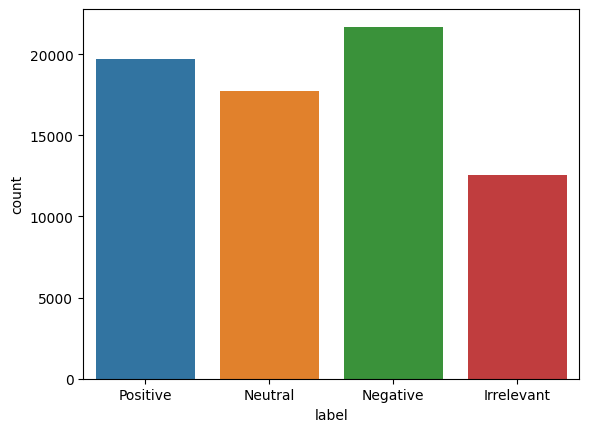

In [ ]:
sns.countplot(x=df['label'])

Text(0.5, 0, 'Message Length')

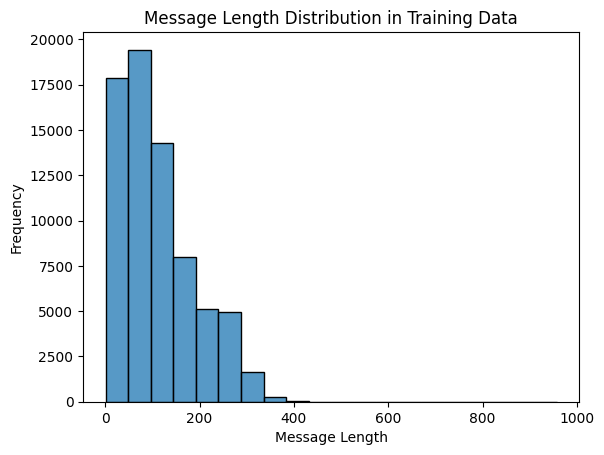

In [ ]:
# Calculate the length of each message
message_length=(df['text']).apply(len)
sns.histplot(x=message_length,bins=20)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')

#Preprocessed text

In [ ]:
import spacy
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
df['Preprocessed text'] = df['text'].apply(preprocess)

In [ ]:
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])

In [ ]:
df

,id,country,label,text,Preprocessed text
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,m get borderland murder
...,...,...,...,...,...
74676,9200,Nvidia,3,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74677,9200,Nvidia,3,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74678,9200,Nvidia,3,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74679,9200,Nvidia,3,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


In [ ]:
tv=TfidfVectorizer()
df_tv=tv.fit_transform(df['Preprocessed text'])

In [ ]:
print(df_tv)

  (0, 14186)	0.5019686782389964
  (0, 4300)	0.7503332981844422
  (0, 5882)	0.43014809973153667
  (1, 4303)	0.6308352317883091
  (1, 10718)	0.4731922339217186
  (1, 14186)	0.6149276543551802
  (2, 16730)	0.7359220742014858
  (2, 4303)	0.519630312809822
  (2, 5882)	0.4340541886817236
  (3, 16730)	0.7497229075893237
  (3, 4303)	0.5293750013057333
  (3, 10718)	0.3970864765115596
  (4, 16730)	0.7497229075893237
  (4, 4303)	0.5293750013057333
  (4, 10718)	0.3970864765115596
  (5, 16356)	0.32986143201396134
  (5, 5868)	0.0950308449908003
  (5, 25306)	0.12371465037450177
  (5, 18780)	0.12279967472353039
  (5, 8680)	0.17199301599436456
  (5, 6478)	0.31519414526267836
  (5, 26163)	0.2882003846504435
  (5, 12710)	0.23515040647542382
  (5, 17993)	0.2103819690143733
  (5, 18508)	0.17463994232150065
  :	:
  (71652, 17401)	0.335661757431383
  (71652, 12602)	0.28873546946764583
  (71652, 20209)	0.3195397101596675
  (71652, 27556)	0.21093083092118967
  (71653, 18390)	0.41917259340568874
  (71653, 17512

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_tv, df['label'],test_size=0.2, random_state=42)

In [ ]:
x_test.shape

(14331, 28054)

In [ ]:
y_test.shape

(14331,)

#Machine Learning Model

##Naive bayes

In [ ]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print('classification_report:\n',classification_report(y_test,y_pred_nb))
print('accuracy:',accuracy_score(y_test,y_pred_nb)*100)
print('Error value',np.mean(y_pred_nb!=y_test)*100)
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_nb))

classification_report:
               precision    recall  f1-score   support

           0       0.95      0.44      0.61      2455
           1       0.66      0.89      0.76      4433
           2       0.82      0.64      0.72      3532
           3       0.69      0.79      0.74      3911

    accuracy                           0.72     14331
   macro avg       0.78      0.69      0.71     14331
weighted avg       0.76      0.72      0.72     14331

accuracy: 72.40946200544275
Error value 27.590537994557252
confusion_matrix
 [[1092  669  142  552]
 [  17 3929  168  319]
 [  23  754 2265  490]
 [  17  615  188 3091]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

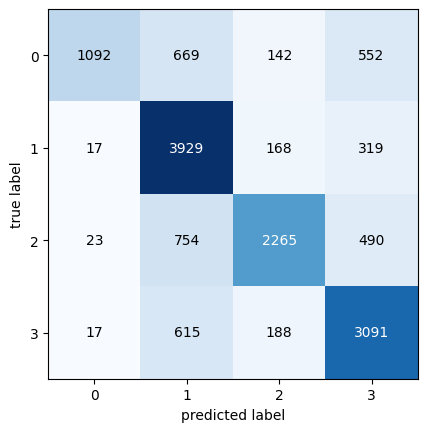

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_nb))

## Logistic regression

In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)
print('classification_report:\n',classification_report(y_test,y_pred_lg))
print('accuracy:',accuracy_score(y_test,y_pred_lg)*100)
print('Error value',np.mean(y_pred_lg!=y_test)*100)
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_lg))

classification_report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.73      2455
           1       0.80      0.83      0.81      4433
           2       0.73      0.76      0.75      3532
           3       0.75      0.79      0.77      3911

    accuracy                           0.77     14331
   macro avg       0.77      0.76      0.76     14331
weighted avg       0.77      0.77      0.77     14331

accuracy: 77.13348684669597
Error value 22.866513153304027
confusion_matrix
 [[1616  263  246  330]
 [ 119 3666  324  324]
 [ 127  352 2690  363]
 [ 131  293  405 3082]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

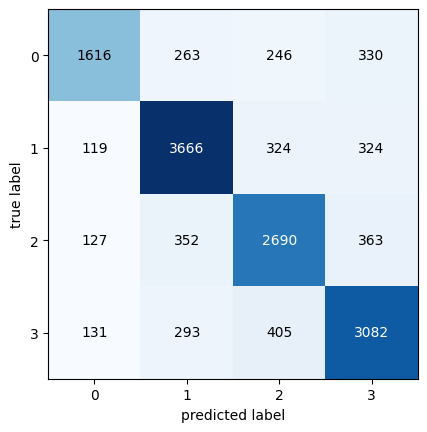

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_lg))

#VADER Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Function to get sentiment scores for a given text
def get_sentiment_scores(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

In [ ]:
df3=df.copy()

In [ ]:
# Apply the sentiment analysis function to the 'text' column and create new columns for scores
df3['sentiment_scores'] = df3['text'].apply(get_sentiment_scores)

In [ ]:
df3['sentiment_scores']

0        {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...
1        {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
2        {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
3        {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...
4        {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
                               ...                        
74676    {'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'co...
74677    {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...
74678    {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...
74679    {'neg': 0.074, 'neu': 0.842, 'pos': 0.084, 'co...
74680    {'neg': 0.09, 'neu': 0.728, 'pos': 0.182, 'com...
Name: sentiment_scores, Length: 71655, dtype: object

In [ ]:
# Extract individual sentiment scores into separate columns
df3['compound'] = df3['sentiment_scores'].apply(lambda x: x['compound'])
df3['positive'] = df3['sentiment_scores'].apply(lambda x: x['pos'])
df3['neutral'] = df3['sentiment_scores'].apply(lambda x: x['neu'])
df3['negative'] = df3['sentiment_scores'].apply(lambda x: x['neg'])

In [ ]:
df3['sentiment'] = df3['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

In [ ]:
df3

,id,country,label,text,Preprocessed text,sentiment_scores,compound,positive,neutral,negative,sentiment
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,0.000,0.657,0.343,Negative
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,m get borderland kill,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,0.000,0.630,0.370,Negative
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,m come borderland murder,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,0.000,0.630,0.370,Negative
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,0.000,0.657,0.343,Negative
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,m get borderland murder,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,0.000,0.630,0.370,Negative
...,...,...,...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,3,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...,"{'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'co...",0.0772,0.097,0.817,0.086,Positive
74677,9200,Nvidia,3,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2960,0.000,0.896,0.104,Negative
74678,9200,Nvidia,3,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.2960,0.000,0.909,0.091,Negative
74679,9200,Nvidia,3,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...,"{'neg': 0.074, 'neu': 0.842, 'pos': 0.084, 'co...",0.0772,0.084,0.842,0.074,Positive


In [ ]:
df3['sentiment']

0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
74676    Positive
74677    Negative
74678    Negative
74679    Positive
74680    Positive
Name: sentiment, Length: 71655, dtype: object

In [ ]:
# by HARI

In [ ]:
#HAPPY CODING!!!